annotated_0014_2m_0P_-10V_-10H.txt -> ไม่มีข้อมูล
0025_2m_0P_0V_10H.txt -> ['cx=71.48, cy=67.11, r=26.42']
annotated_0047_2m_-15P_10V_0H.txt -> ไม่มีข้อมูล
annotated_0043_2m_0P_-10V_15H.txt -> ไม่มีข้อมูล
0007_2m_0P_-10V_-5H.txt -> ['cx=59.29, cy=62.48, r=32.19']
annotated_0047_2m_30P_10V_0H.txt -> ไม่มีข้อมูล
annotated_0001_2m_-30P_10V_-10H.txt -> ไม่มีข้อมูล
annotated_0010_2m_-30P_-10V_-15H.txt -> ไม่มีข้อมูล
annotated_0038_2m_-30P_10V_-10H.txt -> ไม่มีข้อมูล
annotated_0033_2m_30P_0V_0H.txt -> ไม่มีข้อมูล


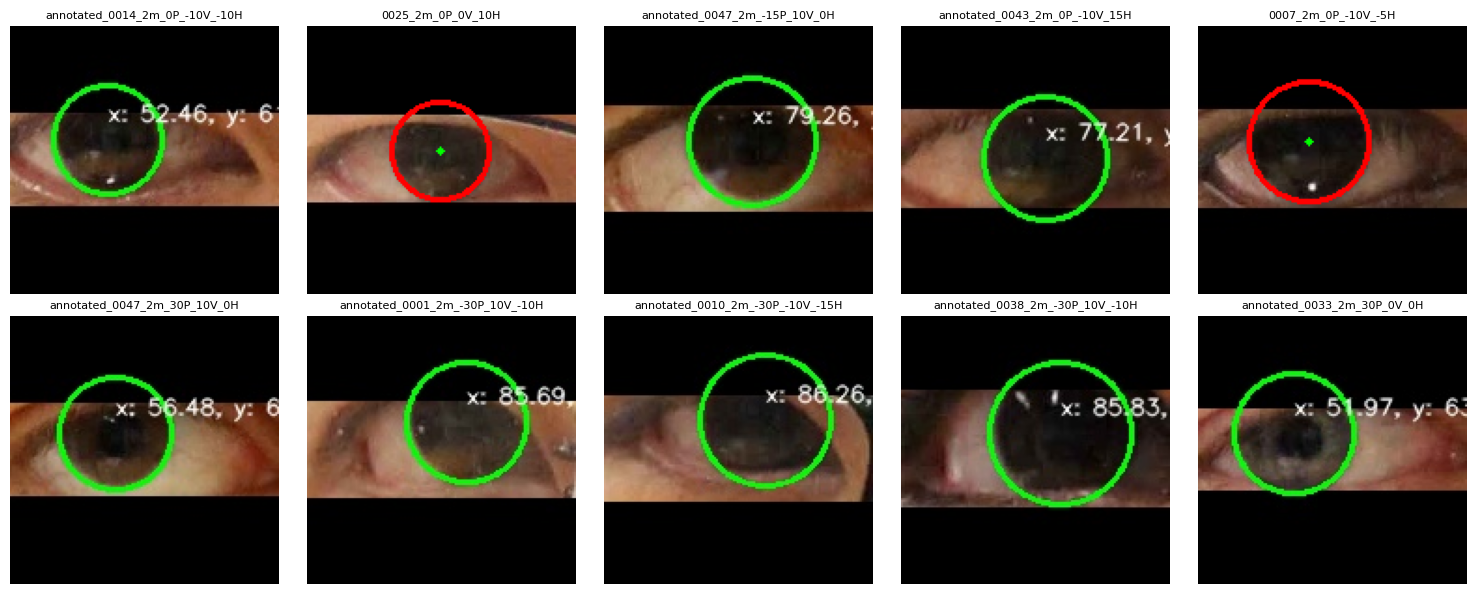

In [7]:
import cv2
import os
import glob
import random
import matplotlib.pyplot as plt

# ------------------------
# กำหนดโฟลเดอร์
# ------------------------
img_dir = "./data/Right/Image144x144"
ann_dir = "./data/Right/Annotation144x144"

# ดึงรายการไฟล์ภาพทั้งหมด
images = sorted(glob.glob(os.path.join(img_dir, "*.jpg")))

# สุ่มเลือก 10 ภาพ (หรือทั้งหมดถ้าน้อยกว่า 10)
sampled_images = random.sample(images, min(10, len(images)))

# เตรียม plot
n = len(sampled_images)
cols = 5
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
axes = axes.flatten()

for i, img_path in enumerate(sampled_images):
    base = os.path.splitext(os.path.basename(img_path))[0]
    ann_path = os.path.join(ann_dir, base + ".txt")

    # โหลดภาพ
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # แปลง BGR -> RGB
    img_draw = image.copy()

    ann_texts = []  # เก็บ annotation ของไฟล์นี้

    # โหลด annotation (3 ค่า: cx, cy, r)
    if os.path.exists(ann_path):
        with open(ann_path, "r") as f:
            lines = f.readlines()
        for line in lines:
            values = line.strip().split()
            if len(values) == 3:
                cx = float(values[0])
                cy = float(values[1])
                r  = float(values[2])  # ใช้เป็น radius เลย

                # เก็บไว้เพื่อ print
                ann_texts.append(f"cx={cx:.2f}, cy={cy:.2f}, r={r:.2f}")

                # วาดจุดกึ่งกลาง (สีเขียว)
                cv2.circle(img_draw, (int(cx), int(cy)), 2, (0, 255, 0), -1)

                # วาดวงกลมรอบจุด (สีน้ำเงิน)
                cv2.circle(img_draw, (int(cx), int(cy)), int(r), (255, 0, 0), 2)

    # แสดงใน subplot
    axes[i].imshow(img_draw)
    axes[i].set_title(base, fontsize=8)
    axes[i].axis("off")

    # print annotation ของไฟล์นี้
    if ann_texts:
        print(f"{base}.txt -> {ann_texts}")
    else:
        print(f"{base}.txt -> ไม่มีข้อมูล")

# ช่องเกินปิดออก
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
